### Nallabothula Vamsi AIE21086
### Lab02

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

### A1.

Playing First Derivative Signal:


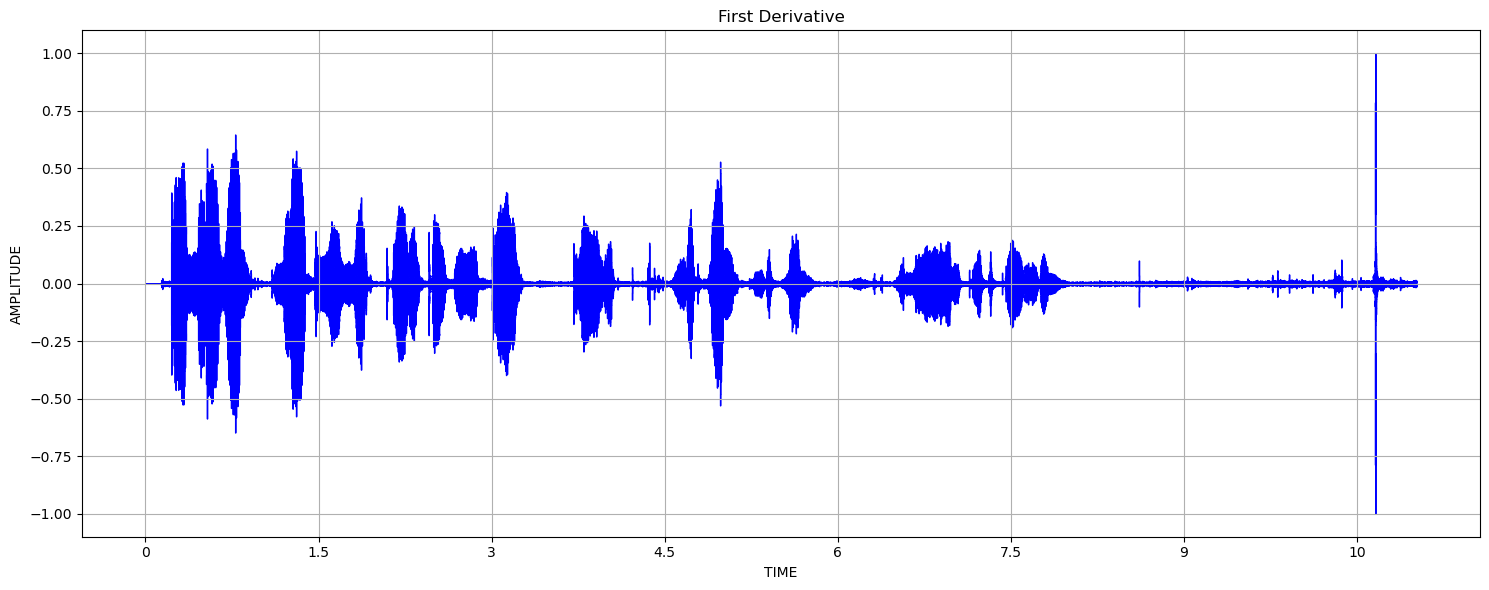

In [3]:
# Load audio file
audio_file = "vamsi2.wav"
y_new, sample_rate_new = librosa.load(audio_file)


first_derivative_new = np.diff(y_new)
first_derivative_new /= np.max(np.abs(first_derivative_new))  # Normalize

print("Playing First Derivative Signal:")

# Plotting the first derivative
plt.figure(figsize=(15, 6))
librosa.display.waveshow(first_derivative_new, sr=sample_rate_new, color='blue')
plt.title('First Derivative')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Play the first derivative of the audio signal
ipd.Audio(first_derivative_new, rate=sample_rate_new)


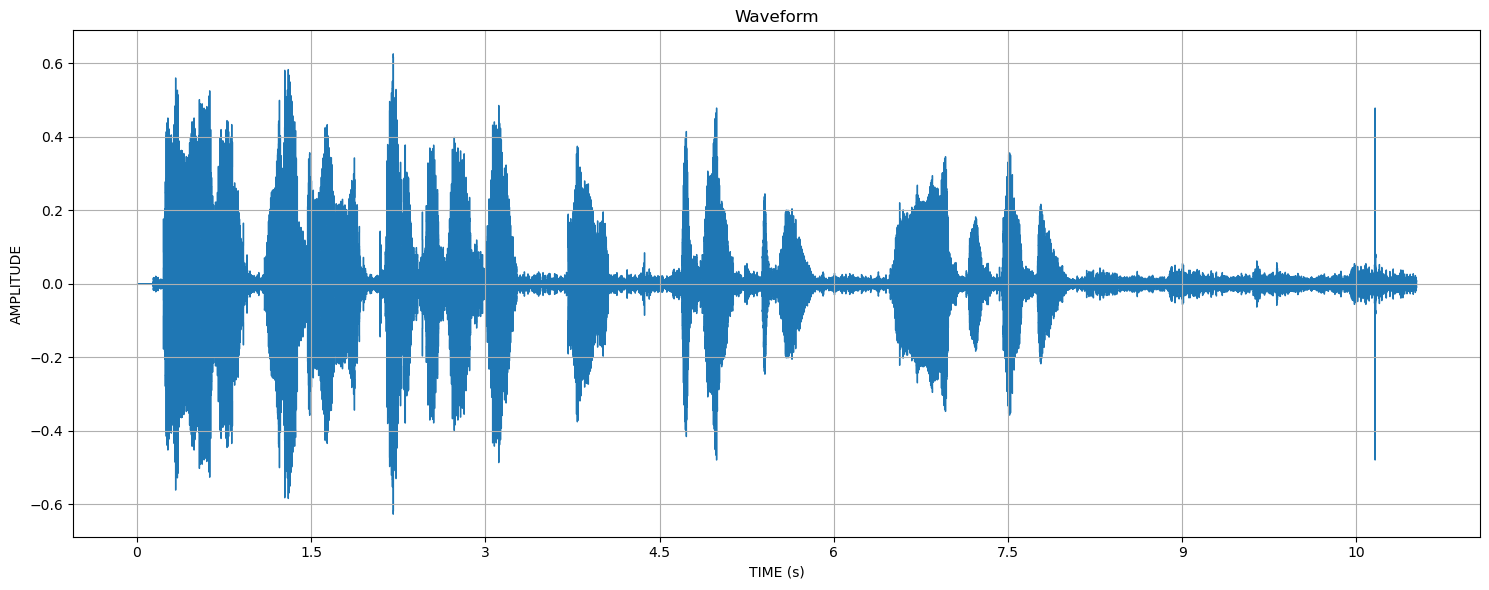

In [8]:
plt.figure(figsize=(15, 6))
librosa.display.waveshow(y_new, sr=sample_rate_new)
plt.title('Waveform')
plt.xlabel('TIME (s)')
plt.ylabel('AMPLITUDE')
plt.grid(True)
plt.tight_layout()
plt.show()
# Playing back the audio
ipd.Audio(y_new, rate=sample_rate_new)

### A2

C:\Users\SaiSu\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\SaiSu\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\SaiSu\AppData\Local\Temp\ipykernel_16204\284235481.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(new_speech_intervals)), new_speech_intervals, 'ro', label='Vocal intervals', color='green')
C:\Users\SaiSu\AppData\Local\Temp\ipykernel_16204\284235481.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(new_speech_intervals), len(new_speech_intervals) + len(new_silence_intervals)), 

Average length between consecutive zero crossings in vocal regions: nan
Average length between consecutive zero crossings in silent regions: 4.347270239124172


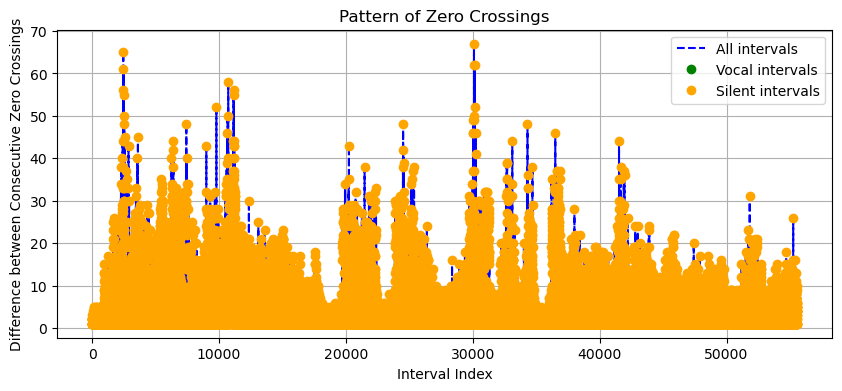

In [10]:
new_zero_crossings = np.where(np.diff(np.sign(first_derivative_new)))[0]
new_zero_crossing_diffs = np.diff(new_zero_crossings)
new_threshold = 1200

# Distinguish between different regions based on the threshold
new_speech_intervals = new_zero_crossing_diffs[new_zero_crossing_diffs > new_threshold]
new_silence_intervals = new_zero_crossing_diffs[new_zero_crossing_diffs <= new_threshold]

# Calculate average lengths
new_avg_speech_interval_length = np.mean(new_speech_intervals)
new_avg_silence_interval_length = np.mean(new_silence_intervals)

# Print average lengths
print("Average length between consecutive zero crossings in vocal regions:", new_avg_speech_interval_length)
print("Average length between consecutive zero crossings in silent regions:", new_avg_silence_interval_length)

# Plotting with different colors and styles
plt.figure(figsize=(10, 4))
plt.plot(new_zero_crossing_diffs, label='All intervals', color='blue', linestyle='--')
plt.plot(np.arange(len(new_speech_intervals)), new_speech_intervals, 'ro', label='Vocal intervals', color='green')
plt.plot(np.arange(len(new_speech_intervals), len(new_speech_intervals) + len(new_silence_intervals)), new_silence_intervals, 'bo', label='Silent intervals', color='orange')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Interval Index')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.grid(True)
plt.show()


### A3.

Duration of my audio: 8.064036281179138 seconds
Duration of my teammate's audio: 4.3920181405895695 seconds


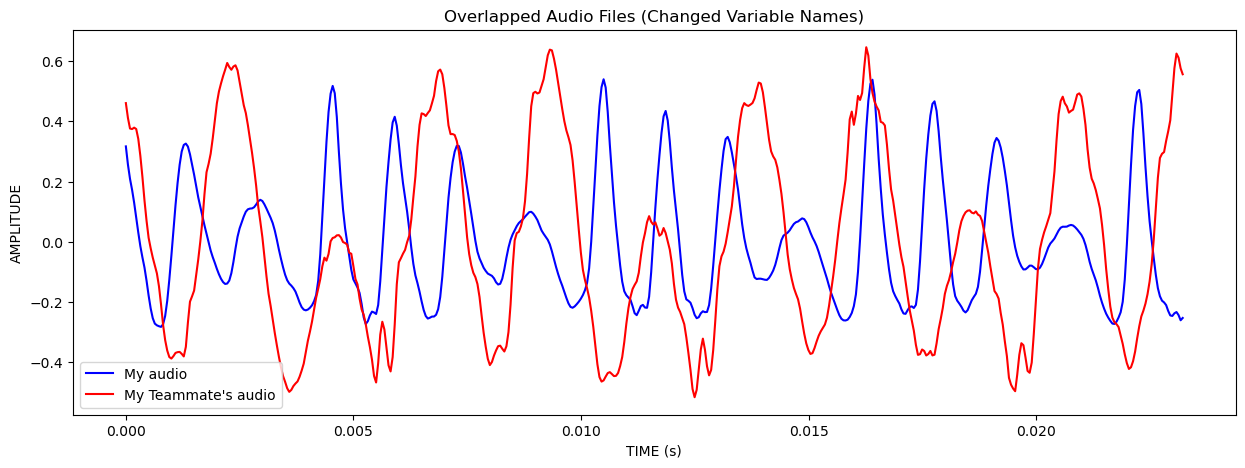

In [15]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Modified code with changed variable names
my_audio_file = r'my_voice.wav'
my_teammate_audio_file = r'my_teammate.wav'

# Load audio signals
my_audio, my_sr = librosa.load(my_audio_file)
my_teammate_audio, my_teammate_sr = librosa.load(my_teammate_audio_file)

# Duration of audio files
my_duration = librosa.get_duration(y=my_audio, sr=my_sr)
my_teammate_duration = librosa.get_duration(y=my_teammate_audio, sr=my_teammate_sr)

print("Duration of my audio:", my_duration, "seconds")
print("Duration of my teammate's audio:", my_teammate_duration, "seconds")

# Function to remove silence
def remove_silence_custom(audio, sample_rate, threshold=0.01):
    trimmed_audio = librosa.effects.trim(audio, top_db=threshold)
    return trimmed_audio[0]

# Trim silence from audio signals
my_trimmed_audio = remove_silence_custom(my_audio, my_sr)
my_teammate_trimmed_audio = remove_silence_custom(my_teammate_audio, my_teammate_sr)

# Calculate the time axes for the trimmed audio files
my_time = np.linspace(0, len(my_trimmed_audio) / my_sr, len(my_trimmed_audio))
my_teammate_time = np.linspace(0, len(my_teammate_trimmed_audio) / my_teammate_sr, len(my_teammate_trimmed_audio))

# Plot the trimmed audio files with different labels and colors
plt.figure(figsize=(15, 5))
plt.plot(my_time, my_trimmed_audio, label="My audio", color='blue')
plt.plot(my_teammate_time, my_teammate_trimmed_audio, label="My Teammate's audio", color='red')
plt.legend()
plt.xlabel('TIME (s)')
plt.ylabel('AMPLITUDE')
plt.title('Overlapped Audio Files (Changed Variable Names)')
plt.show()


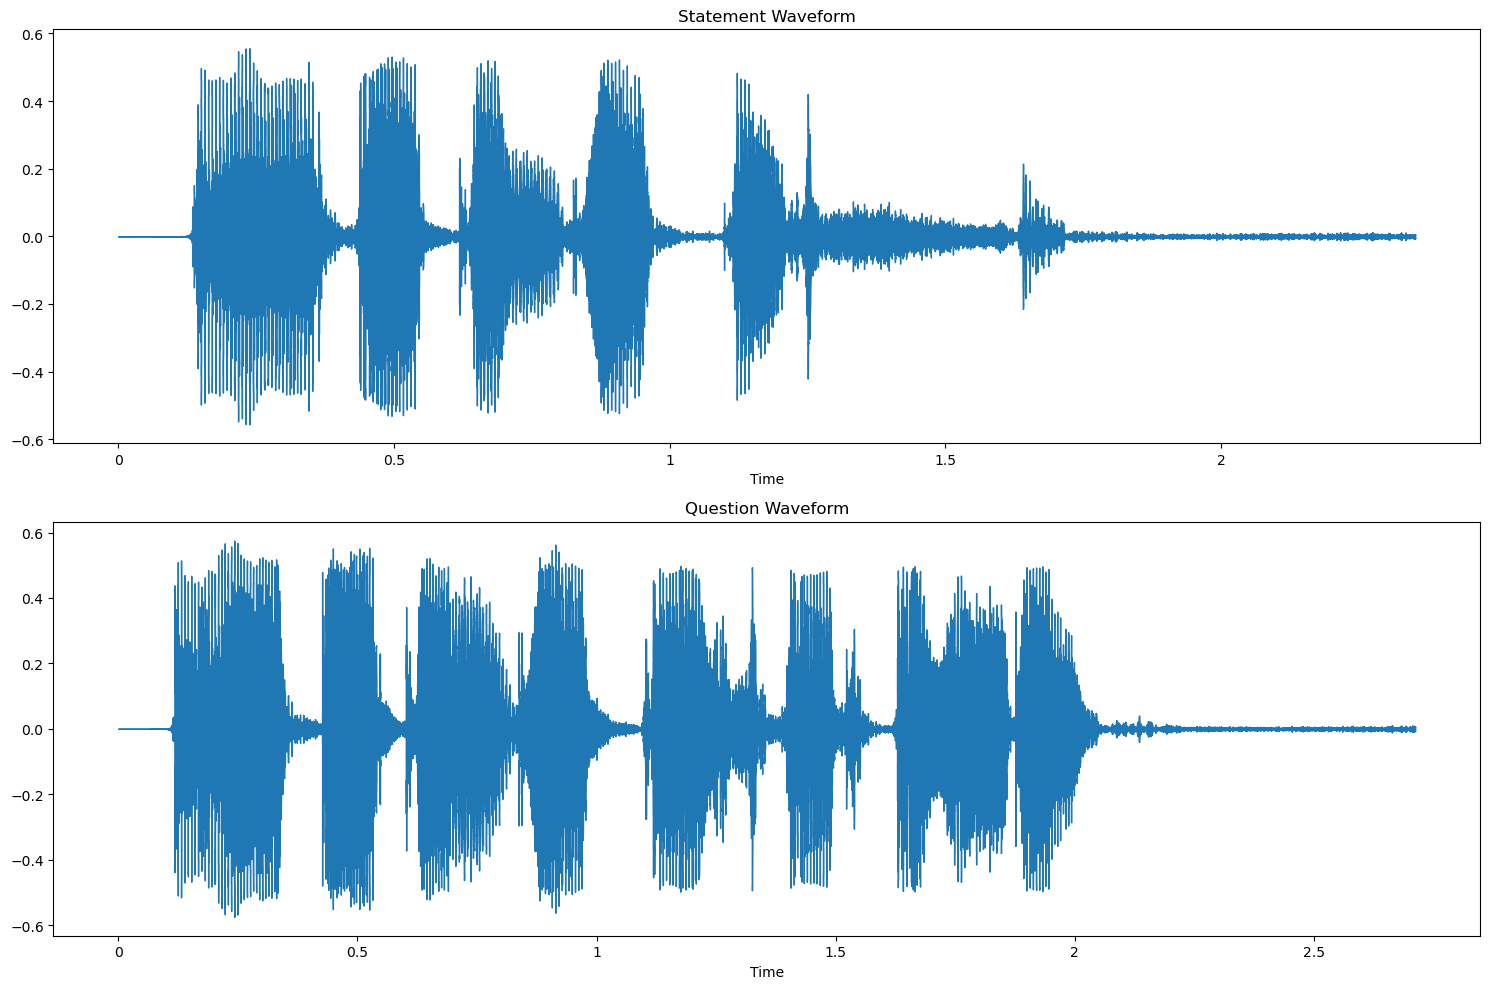

In [18]:

stmt_signal, sr_stmt = librosa.load('statmt.wav') 
qn_signal, sr_qn = librosa.load('Qn.wav')
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
librosa.display.waveshow(stmt_signal, sr=sr_stmt)
plt.title('Statement Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(qn_signal, sr=sr_qn)
plt.title('Question Waveform')
plt.tight_layout()
plt.show()